# Microsoft Movie Studios

Author: Mario Mocombe

**Overview**

Microsoft is creating a new movie studio and is inquiring about what types of films are currently doing the best at the box office.  The datasets used in answering the business problem are from various movie websites and contain box office information. Methods used were exploratory data analysis, data cleaning, and data manipulation.  The data shows that the highest grossing genre of films are Adventure, Action, and Comedy.  The highest grossing time of the year for movie releases is May.  There is also a positive correlation between a film's production budget and its profits.  Ideally, we should make it a priority to hire Christopher Nolan as film director. 

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Questions to consider:

1. What are the highest grossing genre of movies?
2. What time of the year is best to release a movie?
3. Is there a correlation between budget and profit?
4. Who are fan favorite directors that we should look to hire?

These questions were considered in order to maximize studio success.  Profits are one marker of a film's success, telling us whether or not the film was financially worth pursuing.  Finding out whether a large budget is favorable will aid the studio into making informed decisions.  Data on the highest grossing genres will help Microsoft Studios narrow down on what type of films to invest in.  The release window also influences a film's success.  It's key that the studio releases it at a time where the most people will go see it.  Finally, it's important to choose a proven visionary for the director's chair. 

## Data Understanding
Note that this data may not reflect the most up-to-date box office information.

1) im.db.zip 

    A zipped SQLite database containing movie data from the website Internet Movie Data Base. There is information on genre, online user votes, average user ratings, roles of people involved in the film etc... The most relevant tables are movie_basics and movie_ratings.

2) bom.movie_gross.csv.gz

    A compressed CSV file containing box office data from the website Box Office Mojo.  Domestic and Foreign Gross are the
    most relevant features.
    
3) tn.movie_budgets.csv.gz

    A compressed CSV file containing box office data, release dates, and budget data from the website The Numbers.

In [1]:
##Import Standard Packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. What are the highest grossing genres of movies?

## Connect to the IMDB database

In [2]:
# unzip the imdb database file
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [3]:
# make a connection with the IMDB DATABASE using SQLite3
conn = sqlite3.connect('zippedData/im.db')

In [4]:
# set up a cursor in order to browse through the database.
# A cursor object is what can actually execute SQL commands. You create it by calling .cursor() on the connection.

cur = conn.cursor()

# This is a special query for finding the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [5]:
# Use the fetchall method to find out the table names
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [6]:
# use the pd.read_sql function to generate a dataframe
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
# generate movie ratings table
pd.read_sql("SELECT * FROM movie_ratings ORDER BY movie_id;", conn)

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


## Join Tables

In [8]:
# select relevant columns and join tables using a shared column

# filter out lesser popular titles

s = """
SELECT primary_title, runtime_minutes, genres, averagerating, numvotes 
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
WHERE numvotes > 62500
ORDER BY numvotes DESC
;
"""
# make imdb dataframe
imdb = pd.read_sql(s, conn)

In [9]:
#use exploratory data analysis
imdb.head(20)

,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769
2,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,165.0,"Drama,Western",8.4,1211405
4,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,138.0,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,121.0,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,108.0,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,142.0,"Action,Adventure,Sci-Fi",7.2,795227


In [10]:
# .info provides a useful overview of the data
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    925 non-null    object 
 1   runtime_minutes  925 non-null    float64
 2   genres           925 non-null    object 
 3   averagerating    925 non-null    float64
 4   numvotes         925 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 36.3+ KB


In [11]:
# .describe() calculates the basic summary statistics for each column
imdb.describe()

,runtime_minutes,averagerating,numvotes
count,925.000000,925.000000,9.250000e+02
mean,113.921081,6.808757,2.017624e+05
std,18.854227,0.835132,1.785720e+05
min,80.000000,1.600000,6.258900e+04
25%,101.000000,6.300000,8.846900e+04
50%,111.000000,6.800000,1.364470e+05
75%,124.000000,7.400000,2.377200e+05
max,321.000000,9.300000,1.841066e+06


## Box Office Mojo Database

In [12]:
# Import the file
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [14]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### The dtype for the foreign_gross column is a string, we have to change this into either a float or integer.  When we use the astype function we encounter the following errors:


bom['foreign_gross'].astype(float) Gives Error: could not convert string to float: '1,131.6'

bom['foreign_gross'].astype(int) Gives Error: cannot convert float NaN to integer

In [15]:
# sorting the values by domestic gross, we see that the foreign gross is off for 3 of the top results.
bom.sort_values(by=['domestic_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [16]:
# sorting the values by foreign gross, we see that the top 5 results are popular franchises with a little over $1k gross.
bom.sort_values(by=['foreign_gross'])

,title,studio,domestic_gross,foreign_gross,year
2760,The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [17]:
# REPLACE the incorrect values with more realistic ones.  The five entries were most likely meant to contain billions in gross.
bom['foreign_gross'] = bom['foreign_gross'].replace(['1,010.0','1,019.4','1,131.6', '1,163.0','1,369.5'], ['1010000000', '1019000000', '1131000000', '1163000000', '1369000000'])

In [18]:
#check to see if the values changed
bom.sort_values(by=['domestic_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131000000,2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,1369000000,2018
1873,Jurassic World,Uni.,652300000.0,1019000000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


## Data Preparation


## Drop Rows
In order to find the highest total grossing movies we need both domestic and foreign gross values.  Films with missing values in either gross column should be droppped:

In [19]:
# drop rows with missing gross values
bom.dropna(inplace=True)

In [20]:
# check to see if changes were made
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


The 'foreign_gross' column has the dtype 'object'.  We need to change this into a numerical dtype, preferably to integer in order to make the values easier to read.   Change the 'domestic_gross' dtype to integer as well.

In [21]:
# convert 'domestic gross' column from float to integer
bom['domestic_gross'] = bom['domestic_gross'].astype(int)

In [22]:
# convert 'foreign gross' column from object to integer
bom['foreign_gross'] = bom['foreign_gross'].astype(int)

In [23]:
# check to see if changes were made
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int32 
 3   foreign_gross   2007 non-null   int32 
 4   year            2007 non-null   int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 78.4+ KB


## Create New Column

We will create a new column called 'total_gross' which combines both foreign and domestic grosses.  

In [24]:
# create a total_gross column
bom['total_gross'] = bom['domestic_gross'] + bom['foreign_gross']

In [25]:
# look at values by total gross
bom.sort_values(by=['total_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000,1131000000,2015,2067700000
3079,Avengers: Infinity War,BV,678800000,1369000000,2018,2047800000
1873,Jurassic World,Uni.,652300000,1019000000,2015,1671300000
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
1874,Furious 7,Uni.,353000000,1163000000,2015,1516000000
...,...,...,...,...,...,...
711,I'm Glad My Mother is Alive,Strand,8700,13200,2011,21900
322,The Thorn in the Heart,Osci.,7400,10500,2010,17900
1110,Cirkus Columbia,Strand,3500,9500,2012,13000
715,Aurora,CGld,5700,5100,2011,10800


## Drop Columns

In [26]:
# movie studio and year are irrelevant to our current question and can be dropped:
bom = bom.drop(['studio', 'year'], axis=1)

In [27]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   domestic_gross  2007 non-null   int32 
 2   foreign_gross   2007 non-null   int32 
 3   total_gross     2007 non-null   int32 
dtypes: int32(3), object(1)
memory usage: 54.9+ KB


In [28]:
bom.describe()

,domestic_gross,foreign_gross,total_gross
count,2.007000e+03,2.007000e+03,2.007000e+03
mean,4.701984e+07,7.862646e+07,1.256463e+08
std,8.162689e+07,1.480804e+08,2.211996e+08
min,4.000000e+02,6.000000e+02,4.900000e+03
25%,6.700000e+05,4.000000e+06,8.239000e+06
50%,1.670000e+07,1.970000e+07,4.240000e+07
75%,5.605000e+07,7.775000e+07,1.337500e+08
max,9.367000e+08,1.369000e+09,2.067700e+09


## Joining Dataframes

In [29]:
# set the bom index to 'title'
bom.set_index('title', inplace=True)

In [30]:
bom

,domestic_gross,foreign_gross,total_gross
title,,,
Toy Story 3,415000000,652000000,1067000000
Alice in Wonderland (2010),334200000,691300000,1025500000
Harry Potter and the Deathly Hallows Part 1,296000000,664300000,960300000
Inception,292600000,535700000,828300000
Shrek Forever After,238700000,513900000,752600000
...,...,...,...
I Still See You,1400,1500000,1501400
The Catcher Was a Spy,725000,229000,954000
Time Freak,10000,256000,266000


In [31]:
#set the imdb index to 'primary_title'
imdb.set_index('primary_title', inplace=True)

In [32]:
imdb

,runtime_minutes,genres,averagerating,numvotes
primary_title,,,,
Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769
Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
Django Unchained,165.0,"Drama,Western",8.4,1211405
The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...
The Death of Stalin,107.0,"Comedy,Drama,History",7.2,63156
Europa Report,90.0,"Drama,Mystery,Sci-Fi",6.4,62994
Underworld: Blood Wars,91.0,"Action,Adventure,Fantasy",5.8,62942


In [33]:
# join the two dataframes using an inner join
joined_df = imdb.join(bom, how='inner')

joined_df

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,292600000,535700000,828300000
The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769,448100000,636800000,1084900000
Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,188000000,489400000,677400000
Django Unchained,165.0,"Drama,Western",8.4,1211405,162800000,262600000,425400000
The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358,116900000,275100000,392000000
...,...,...,...,...,...,...,...
Act of Valor,110.0,"Action,Adventure,Drama",6.5,63787,70000000,11300000,81300000
Trollhunter,103.0,"Drama,Fantasy,Horror",7.0,63470,253000,3900000,4153000
Trolls,92.0,"Adventure,Animation,Comedy",6.5,63295,153700000,193200000,346900000
The Death of Stalin,107.0,"Comedy,Drama,History",7.2,63156,8000000,16600000,24600000


In [34]:
# sort values by gross
joined_df.sort_values(by=['total_gross'], ascending=False).head(20)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,678800000,1369000000,2047800000
Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,652300000,1019000000,1671300000
Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,353000000,1163000000,1516000000
Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000,946400000,1405400000
Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,700100000,646900000,1347000000
Star Wars: The Last Jedi,152.0,"Action,Adventure,Fantasy",7.1,462903,620200000,712400000,1332600000
Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125,417700000,891800000,1309500000
Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,400700000,875700000,1276400000
Incredibles 2,118.0,"Action,Adventure,Animation",7.7,203510,608600000,634200000,1242800000
The Fate of the Furious,136.0,"Action,Crime,Thriller",6.7,179774,226000000,1010000000,1236000000


In [35]:
# filter movies containing the genre 'Action'
action = joined_df['genres'].str.contains('Action')

# Add the sum of the total gross of action films
joined_df.loc[action, ['total_gross']].sum()

total_gross    98800274995
dtype: int64

In [36]:
# repeat for other genres
adventure = joined_df['genres'].str.contains('Adventure')

joined_df.loc[adventure, ['total_gross']].sum()

total_gross    106667023996
dtype: int64

In [37]:
scifi = joined_df['genres'].str.contains('Sci-Fi')

joined_df.loc[scifi, ['total_gross']].sum()

total_gross    39209814999
dtype: int64

In [38]:
comedy = joined_df['genres'].str.contains('Comedy')

joined_df.loc[comedy, ['total_gross']].sum()

total_gross    53519643196
dtype: int64

In [39]:
drama = joined_df['genres'].str.contains('Drama')

joined_df.loc[drama, ['total_gross']].sum()

total_gross    41214138496
dtype: int64

In [40]:
romance = joined_df['genres'].str.contains('Romance')

joined_df.loc[romance, ['total_gross']].sum()

total_gross    8803926798
dtype: int64

In [41]:
fantasy = joined_df['genres'].str.contains('Fantasy')

joined_df.loc[fantasy, ['total_gross']].sum()

total_gross    23548531999
dtype: int64

In [42]:
crime = joined_df['genres'].str.contains('Crime')

joined_df.loc[crime, ['total_gross']].sum()

total_gross    16300406499
dtype: int64

In [43]:
music = joined_df['genres'].str.contains('Music')

joined_df.loc[music, ['total_gross']].sum()

total_gross    2990600000
dtype: int64

In [44]:
thriller = joined_df['genres'].str.contains('Thriller')

joined_df.loc[thriller, ['total_gross']].sum()

total_gross    28418320598
dtype: int64

In [45]:
animation = joined_df['genres'].str.contains('Animation')

joined_df.loc[animation, ['total_gross']].sum()

total_gross    30561400000
dtype: int64

In [46]:
history = joined_df['genres'].str.contains('History')

joined_df.loc[history, ['total_gross']].sum()

total_gross    3518600000
dtype: int64

In [47]:
horror = joined_df['genres'].str.contains('Horror')

joined_df.loc[horror, ['total_gross']].sum()

total_gross    9474700600
dtype: int64

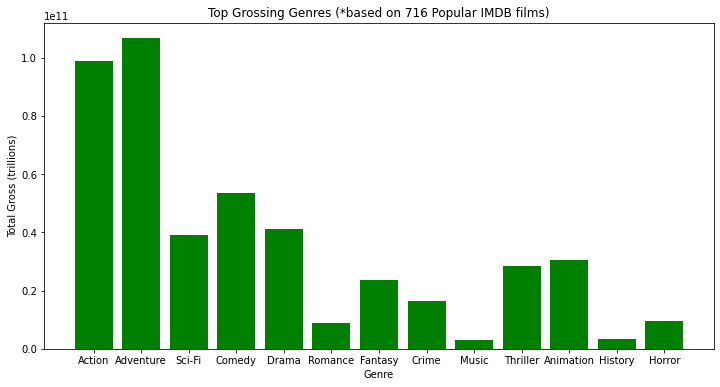

In [48]:
#plot the total gross values by genre
height = [98800274995,106667023996,39209814999,53519643196, 41214138496,8803926798,23548531999,16300406499,2990600000,28418320598,30561400000,3518600000,9474700600]       
x = range(13)
labels = ['Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Drama', 'Romance', 'Fantasy', 'Crime', 'Music', 'Thriller', 'Animation', 'History', 'Horror' ]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color='green')

# Give a title to the bar graph and label the axes
ax.set_title("Top Grossing Genres (*based on 716 Popular IMDB films)")
ax.set_ylabel("Total Gross (trillions)")
ax.set_xlabel("Genre");

The top grossing genres are Adventure, Action, and Comedy.  The former two genres do exceptionally well at the box office.      

# 2. What time of the year is best to release a movie? 

## The Numbers Database

In [49]:
# Load up the third dataframe, THE NUMBERS, with Pandas.
numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Drop Columns

The 'id' column is not necessary.  We can also drop 'domestic_gross', we do not need it for this inquiry.

In [50]:
# drop the 'id' column and 'domestic_gross'
numbers = numbers.drop(['id', 'domestic_gross'], axis=1)

In [51]:
# set the index to the 'movie' column
numbers.set_index('movie', inplace=True)

In [52]:
# preview the dataset
numbers.head()

,release_date,production_budget,worldwide_gross
movie,,,
Avatar,"Dec 18, 2009","$425,000,000","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$1,045,663,875"
Dark Phoenix,"Jun 7, 2019","$350,000,000","$149,762,350"
Avengers: Age of Ultron,"May 1, 2015","$330,600,000","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017","$317,000,000","$1,316,721,747"


In [53]:
numbers.describe()

,release_date,production_budget,worldwide_gross
count,5782,5782,5782
unique,2418,509,5356
top,"Dec 31, 2014","$20,000,000",$0
freq,24,231,367


In [54]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   production_budget  5782 non-null   object
 2   worldwide_gross    5782 non-null   object
dtypes: object(3)
memory usage: 180.7+ KB


Notice that the columns are all in string form.  This is going to be changed.

In [55]:
# change 'release_date' values into datetime objects
numbers['release_date'] = pd.to_datetime(numbers['release_date'])

In [56]:
numbers.head()

,release_date,production_budget,worldwide_gross
movie,,,
Avatar,2009-12-18,"$425,000,000","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2011-05-20,"$410,600,000","$1,045,663,875"
Dark Phoenix,2019-06-07,"$350,000,000","$149,762,350"
Avengers: Age of Ultron,2015-05-01,"$330,600,000","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,2017-12-15,"$317,000,000","$1,316,721,747"


In [57]:
# convert production_budget column into a float. Replace commas and $ signs to avoid errors
numbers['production_budget']= numbers['production_budget'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

In [58]:
# convert worldwide_gross column into a float. Replace commas and $ signs to avoid errors
numbers['worldwide_gross']= numbers['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

In [59]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   production_budget  5782 non-null   float64       
 2   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 180.7+ KB


In [60]:
# make a new 'release month' column by extracting the numeric month from the date
numbers['release_month'] = numbers['release_date'].dt.month

In [61]:
numbers

,release_date,production_budget,worldwide_gross,release_month
movie,,,,
Avatar,2009-12-18,425000000.0,2.776345e+09,12
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000.0,1.045664e+09,5
Dark Phoenix,2019-06-07,350000000.0,1.497624e+08,6
Avengers: Age of Ultron,2015-05-01,330600000.0,1.403014e+09,5
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000.0,1.316722e+09,12
...,...,...,...,...
Red 11,2018-12-31,7000.0,0.000000e+00,12
Following,1999-04-02,6000.0,2.404950e+05,4
Return to the Land of Wonders,2005-07-13,5000.0,1.338000e+03,7


In [62]:
# filter the releases by month and get the mean worldwide gross for each month
Jan = numbers.loc[numbers['release_month'] == 1]

Jan['worldwide_gross'].mean()

46563824.023054756

In [63]:
# repeat for the subsequent months
Feb = numbers.loc[numbers['release_month'] == 2]

Feb['worldwide_gross'].mean()

71544525.81887755

In [64]:
Mar = numbers.loc[numbers['release_month'] == 3]

Mar['worldwide_gross'].mean()

80633371.12978724

In [65]:
Apr = numbers.loc[numbers['release_month'] == 4]

Apr['worldwide_gross'].mean()

59920258.56828194

In [66]:
May = numbers.loc[numbers['release_month'] == 5]

May['worldwide_gross'].mean()

162268003.96805897

In [67]:
June = numbers.loc[numbers['release_month'] == 6]

June['worldwide_gross'].mean()

142523030.59916493

In [68]:
July = numbers.loc[numbers['release_month'] == 7]

July['worldwide_gross'].mean()

140963614.66590908

In [69]:
Aug = numbers.loc[numbers['release_month'] == 8]

Aug['worldwide_gross'].mean()

60978411.048387095

In [70]:
Sep = numbers.loc[numbers['release_month'] == 9]

Sep['worldwide_gross'].mean()

46693687.19269777

In [71]:
Oct = numbers.loc[numbers['release_month'] == 10]

Oct['worldwide_gross'].mean()

49464561.72251309

In [72]:
Nov = numbers.loc[numbers['release_month'] == 11]

Nov['worldwide_gross'].mean()

135741626.89711934

In [73]:
Dec = numbers.loc[numbers['release_month'] == 12]

Dec['worldwide_gross'].mean()

101693170.67516778

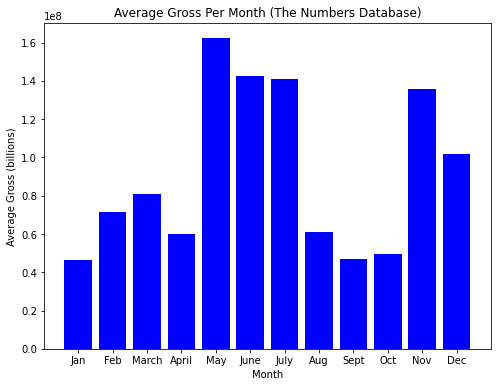

In [74]:
# plot the average box office gross per month
height = [46563824.023054756,71544525.81887755,80633371.12978724,59920258.56828194,162268003.96805897,142523030.59916493,140963614.66590908,60978411.048387095,46693687.19269777,49464561.72251309,135741626.89711934,101693170.67516778]       
x = range(12)
labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec' ]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color= 'blue')

# Give a title to the bar graph and label the axes
ax.set_title("Average Gross Per Month (The Numbers Database)")
ax.set_ylabel("Average Gross (billions)")
ax.set_xlabel("Month");

There is a tremendous spike in box office sales during May, June, and July.  A May release is preferable, so that any hit movie has the potential to sustain a box office presence throughout the summer.   There's also another jump in gross during November and December.

# 3. What is the correlation between budget and return on investment?

In [75]:
# make a new column, "profit"
numbers['profit'] = numbers['worldwide_gross'] - numbers['production_budget']

In [76]:
numbers.head()

,release_date,production_budget,worldwide_gross,release_month,profit
movie,,,,,
Avatar,2009-12-18,425000000.0,2.776345e+09,12,2.351345e+09
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000.0,1.045664e+09,5,6.350639e+08
Dark Phoenix,2019-06-07,350000000.0,1.497624e+08,6,-2.002376e+08
Avengers: Age of Ultron,2015-05-01,330600000.0,1.403014e+09,5,1.072414e+09
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000.0,1.316722e+09,12,9.997217e+08


In [77]:
# sort values by 'profit'
numbers.sort_values(by=['profit'], ascending=False).head(20)

,release_date,production_budget,worldwide_gross,release_month,profit
movie,,,,,
Avatar,2009-12-18,425000000.0,2.776345e+09,12,2.351345e+09
Titanic,1997-12-19,200000000.0,2.208208e+09,12,2.008208e+09
Avengers: Infinity War,2018-04-27,300000000.0,2.048134e+09,4,1.748134e+09
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000.0,2.053311e+09,12,1.747311e+09
Jurassic World,2015-06-12,215000000.0,1.648855e+09,6,1.433855e+09
Furious 7,2015-04-03,190000000.0,1.518723e+09,4,1.328723e+09
The Avengers,2012-05-04,225000000.0,1.517936e+09,5,1.292936e+09
Harry Potter and the Deathly Hallows: Part II,2011-07-15,125000000.0,1.341693e+09,7,1.216693e+09
Black Panther,2018-02-16,200000000.0,1.348258e+09,2,1.148258e+09


In [78]:
numbers.describe()

,production_budget,worldwide_gross,release_month,profit
count,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03
mean,3.158776e+07,9.148746e+07,7.050675,5.989970e+07
std,4.181208e+07,1.747200e+08,3.480147,1.460889e+08
min,1.100000e+03,0.000000e+00,1.000000,-2.002376e+08
25%,5.000000e+06,4.125415e+06,4.000000,-2.189071e+06
50%,1.700000e+07,2.798445e+07,7.000000,8.550286e+06
75%,4.000000e+07,9.764584e+07,10.000000,6.096850e+07
max,4.250000e+08,2.776345e+09,12.000000,2.351345e+09


In [79]:
numbers.sort_values(by=['production_budget'], ascending=False).head(20)

,release_date,production_budget,worldwide_gross,release_month,profit
movie,,,,,
Avatar,2009-12-18,425000000.0,2.776345e+09,12,2.351345e+09
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000.0,1.045664e+09,5,6.350639e+08
Dark Phoenix,2019-06-07,350000000.0,1.497624e+08,6,-2.002376e+08
Avengers: Age of Ultron,2015-05-01,330600000.0,1.403014e+09,5,1.072414e+09
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000.0,1.316722e+09,12,9.997217e+08
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000.0,2.053311e+09,12,1.747311e+09
Avengers: Infinity War,2018-04-27,300000000.0,2.048134e+09,4,1.748134e+09
Pirates of the Caribbean: At Worldâs End,2007-05-24,300000000.0,9.634204e+08,5,6.634204e+08
Justice League,2017-11-17,300000000.0,6.559452e+08,11,3.559452e+08


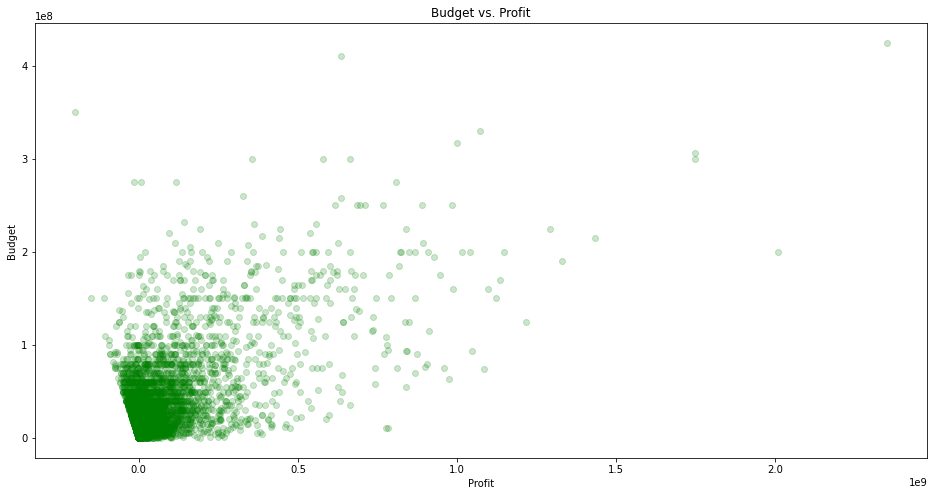

In [80]:
# make scatter plot of budget and profit
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=numbers['profit'],
    y=numbers['production_budget'],
    alpha=0.2,
    color='green')

ax.set_xlabel("Profit")
ax.set_ylabel("Budget")
ax.set_title("Budget vs. Profit");

In [81]:
#calculate correlation coefficient
np.corrcoef(numbers['profit'], numbers['production_budget'])

array([[1.        , 0.60875215],
       [0.60875215, 1.        ]])

There is a strong correlation between production budget and return on investment.  This means we are likely to turn a profit with our project and should be liberal with our spending.  The mean production budget is $31,587,760.  We can go well above that with our budget.

# 4. Who are some fan-favorite directors that we should look to hire? 

## IMDB Database

In [82]:
# show directors with popular movies that are rated 7.5+

d = """
SELECT primary_title, runtime_minutes, genres, category, primary_name, averagerating, numvotes 
FROM principals
JOIN movie_ratings
USING (movie_id)
JOIN movie_basics
USING (movie_id)
JOIN persons
USING (person_id)
WHERE category = "director" AND averagerating >= 7.5
AND numvotes > 63000
ORDER BY numvotes DESC;
"""
imdb2 = pd.read_sql(d, conn)

In [83]:
imdb2.head()

,primary_title,runtime_minutes,genres,category,primary_name,averagerating,numvotes
0,Inception,148.0,"Action,Adventure,Sci-Fi",director,Christopher Nolan,8.8,1841066
1,The Dark Knight Rises,164.0,"Action,Thriller",director,Christopher Nolan,8.4,1387769
2,Interstellar,169.0,"Adventure,Drama,Sci-Fi",director,Christopher Nolan,8.6,1299334
3,Django Unchained,165.0,"Drama,Western",director,Quentin Tarantino,8.4,1211405
4,The Avengers,143.0,"Action,Adventure,Sci-Fi",director,Joss Whedon,8.1,1183655


In [84]:
# value count of directors with popular films
imdb2['primary_name'].value_counts().head(10)

Denis Villeneuve         5
Christopher Nolan        4
Anthony Russo            4
Joe Russo                4
Wes Anderson             3
Martin Scorsese          3
Matthew Vaughn           3
David Fincher            3
Alejandro G. Iñárritu    3
David Yates              2
Name: primary_name, dtype: int64

In [85]:
# set imdb2 index to 'primary_title'
imdb2.set_index('primary_title', inplace=True)

## Join databases

In [86]:
# join imdb2 with bom, with a left join so that we get all the directors' films
directors_df = imdb2.join(bom, how='left')

In [87]:
directors_df

,runtime_minutes,genres,category,primary_name,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
12 Years a Slave,134.0,"Biography,Drama,History",director,Steve McQueen,8.1,577301,56700000.0,131100000.0,1.878000e+08
127 Hours,94.0,"Adventure,Biography,Drama",director,Danny Boyle,7.6,323949,18300000.0,42400000.0,6.070000e+07
42,128.0,"Biography,Drama,Sport",director,Brian Helgeland,7.5,77703,NaN,NaN,NaN
50/50,100.0,"Comedy,Drama,Romance",director,Jonathan Levine,7.7,300475,35000000.0,4200000.0,3.920000e+07
A Monster Calls,108.0,"Animation,Drama,Fantasy",director,J.A. Bayona,7.5,70416,3700000.0,43600000.0,4.730000e+07
...,...,...,...,...,...,...,...,...,...
X-Men: First Class,131.0,"Action,Adventure,Sci-Fi",director,Matthew Vaughn,7.7,608930,146400000.0,207200000.0,3.536000e+08
Your Name.,106.0,"Animation,Drama,Fantasy",director,Makoto Shinkai,8.4,134084,5000000.0,353000000.0,3.580000e+08
Zootopia,108.0,"Adventure,Animation,Comedy",director,Byron Howard,8.0,383446,341300000.0,682500000.0,1.023800e+09
Zootopia,108.0,"Adventure,Animation,Comedy",director,Rich Moore,8.0,383446,341300000.0,682500000.0,1.023800e+09


In [88]:
# sort by numvotes
directors_df.sort_values(by=['numvotes'],ascending=False).head(60)

,runtime_minutes,genres,category,primary_name,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Inception,148.0,"Action,Adventure,Sci-Fi",director,Christopher Nolan,8.8,1841066,292600000.0,5.357000e+08,8.283000e+08
The Dark Knight Rises,164.0,"Action,Thriller",director,Christopher Nolan,8.4,1387769,448100000.0,6.368000e+08,1.084900e+09
Interstellar,169.0,"Adventure,Drama,Sci-Fi",director,Christopher Nolan,8.6,1299334,188000000.0,4.894000e+08,6.774000e+08
Django Unchained,165.0,"Drama,Western",director,Quentin Tarantino,8.4,1211405,162800000.0,2.626000e+08,4.254000e+08
The Avengers,143.0,"Action,Adventure,Sci-Fi",director,Joss Whedon,8.1,1183655,NaN,NaN,NaN
The Wolf of Wall Street,180.0,"Biography,Crime,Drama",director,Martin Scorsese,8.2,1035358,116900000.0,2.751000e+08,3.920000e+08
Shutter Island,138.0,"Mystery,Thriller",director,Martin Scorsese,8.1,1005960,128000000.0,1.668000e+08,2.948000e+08
Guardians of the Galaxy,121.0,"Action,Adventure,Comedy",director,James Gunn,8.1,948394,333200000.0,4.402000e+08,7.734000e+08
Deadpool,108.0,"Action,Adventure,Comedy",director,Tim Miller,8.0,820847,363100000.0,4.200000e+08,7.831000e+08
Star Wars: Episode VII - The Force Awakens,136.0,"Action,Adventure,Fantasy",director,J.J. Abrams,8.0,784780,NaN,NaN,NaN


In [89]:
# filter rows for only Christopher Nolan films
CN = directors_df.loc[directors_df['primary_name'] == 'Christopher Nolan']
CN

,runtime_minutes,genres,category,primary_name,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Dunkirk,106.0,"Action,Drama,History",director,Christopher Nolan,7.9,466580,188000000.0,337200000.0,5.252000e+08
Inception,148.0,"Action,Adventure,Sci-Fi",director,Christopher Nolan,8.8,1841066,292600000.0,535700000.0,8.283000e+08
Interstellar,169.0,"Adventure,Drama,Sci-Fi",director,Christopher Nolan,8.6,1299334,188000000.0,489400000.0,6.774000e+08
The Dark Knight Rises,164.0,"Action,Thriller",director,Christopher Nolan,8.4,1387769,448100000.0,636800000.0,1.084900e+09


In [90]:
CN.describe()

# AVERAGE Rating 8.425

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
count,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
mean,146.750000,8.425000,1.248687e+06,2.791750e+08,4.997750e+08,7.789500e+08
std,28.605069,0.386221,5.728622e+05,1.229385e+08,1.246391e+08,2.385668e+08
min,106.000000,7.900000,4.665800e+05,1.880000e+08,3.372000e+08,5.252000e+08
25%,137.500000,8.275000,1.091146e+06,1.880000e+08,4.513500e+08,6.393500e+08
50%,156.000000,8.500000,1.343552e+06,2.403000e+08,5.125500e+08,7.528500e+08
75%,165.250000,8.650000,1.501093e+06,3.314750e+08,5.609750e+08,8.924500e+08
max,169.000000,8.800000,1.841066e+06,4.481000e+08,6.368000e+08,1.084900e+09


In [91]:
CN['numvotes'].sum()
# NUMVOTES 4994749
# AVG TOTAL GROSS $778,950,000

4994749

In [92]:
# filter rows for only Denis Villeneuve films
DV = directors_df.loc[directors_df['primary_name'] == 'Denis Villeneuve']
DV

,runtime_minutes,genres,category,primary_name,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Arrival,116.0,"Drama,Mystery,Sci-Fi",director,Denis Villeneuve,7.9,515483,100500000.0,102800000.0,203300000.0
Blade Runner 2049,164.0,"Drama,Mystery,Sci-Fi",director,Denis Villeneuve,8.0,376241,92100000.0,167200000.0,259300000.0
Incendies,131.0,"Drama,Mystery,War",director,Denis Villeneuve,8.3,124156,NaN,NaN,NaN
Prisoners,153.0,"Crime,Drama,Mystery",director,Denis Villeneuve,8.1,526273,61000000.0,61100000.0,122100000.0
Sicario,121.0,"Action,Crime,Drama",director,Denis Villeneuve,7.6,328548,46900000.0,38000000.0,84900000.0


In [93]:
DV['numvotes'].sum()
# NUMVOTES 1870701

1870701

In [94]:
DV.describe()

# AVERAGE Rating 7.98
# NUMVOTES 1870701
# Avg Total Gross $167,400,000

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
count,5.000000,5.000000,5.000000,4.000000e+00,4.000000e+00,4.000000e+00
mean,137.000000,7.980000,374140.200000,7.512500e+07,9.227500e+07,1.674000e+08
std,20.724382,0.258844,164086.363128,2.535224e+07,5.669270e+07,7.872475e+07
min,116.000000,7.600000,124156.000000,4.690000e+07,3.800000e+07,8.490000e+07
25%,121.000000,7.900000,328548.000000,5.747500e+07,5.532500e+07,1.128000e+08
50%,131.000000,8.000000,376241.000000,7.655000e+07,8.195000e+07,1.627000e+08
75%,153.000000,8.100000,515483.000000,9.420000e+07,1.189000e+08,2.173000e+08
max,164.000000,8.300000,526273.000000,1.005000e+08,1.672000e+08,2.593000e+08


In [95]:
# filter rows for only Russo Brothers films
RU = directors_df.loc[directors_df['primary_name'] == 'Anthony Russo']
RU

,runtime_minutes,genres,category,primary_name,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Avengers: Endgame,181.0,"Action,Adventure,Sci-Fi",director,Anthony Russo,8.8,441135,NaN,NaN,NaN
Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",director,Anthony Russo,8.5,670926,678800000.0,1.369000e+09,2.047800e+09
Captain America: Civil War,147.0,"Action,Adventure,Sci-Fi",director,Anthony Russo,7.8,583507,408100000.0,7.452000e+08,1.153300e+09
Captain America: The Winter Soldier,136.0,"Action,Adventure,Sci-Fi",director,Anthony Russo,7.8,666252,259800000.0,4.545000e+08,7.143000e+08


In [96]:
RU['numvotes'].sum()
# NUMVOTES 2361820

2361820

In [97]:
RU.describe()
# AVERAGE Rating 8.225
# NUMVOTES 2361820
# AVG TOTAL GROSS $1,305,133,000

,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
count,4.000000,4.0000,4.000000,3.000000e+00,3.000000e+00,3.000000e+00
mean,153.250000,8.2250,590455.000000,4.489000e+08,8.562333e+08,1.305133e+09
std,19.362765,0.5058,107339.809568,2.124588e+08,4.672514e+08,6.795922e+08
min,136.000000,7.8000,441135.000000,2.598000e+08,4.545000e+08,7.143000e+08
25%,144.250000,7.8000,547914.000000,3.339500e+08,5.998500e+08,9.338000e+08
50%,148.000000,8.1500,624879.500000,4.081000e+08,7.452000e+08,1.153300e+09
75%,157.000000,8.5750,667420.500000,5.434500e+08,1.057100e+09,1.600550e+09
max,181.000000,8.8000,670926.000000,6.788000e+08,1.369000e+09,2.047800e+09


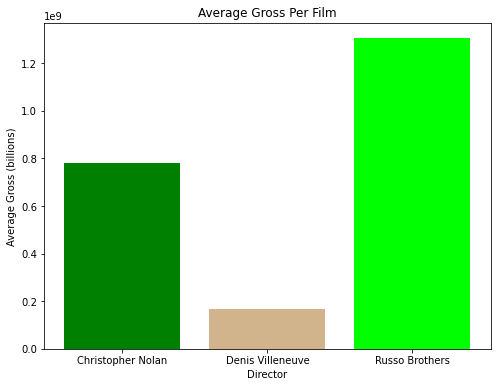

In [98]:
# plot the average box office gross per film by director
height = [7.789500e+08,1.674000e+08,1.305133e+09]       
x = range(3)
labels = ['Christopher Nolan', 'Denis Villeneuve', 'Russo Brothers']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color=['green','tan','lime'])

# Give a title to the bar graph and label the axes
ax.set_title("Average Gross Per Film")
ax.set_ylabel("Average Gross (billions)")
ax.set_xlabel("Director");

Though the four Russo Brothers films are the highest grossing, they are all in the same genre and are Marvel Superhero films, backed by Disney.  They have the advantage of being sequels to films that are a part of a popular franchise, using established comic book source material.  As a new studio Microsoft is unlikely to replicate the Russo Brothers' success without Marvel licensing.

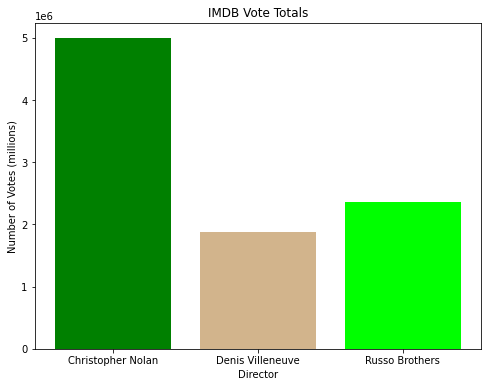

In [99]:
# plot the number of IMDB votes by director
height = [CN['numvotes'].sum(),DV['numvotes'].sum(),RU['numvotes'].sum()]       
x = range(3)
labels = ['Christopher Nolan', 'Denis Villeneuve', 'Russo Brothers']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color=['green','tan','lime'])

# Give a title to the bar graph and label the axes
ax.set_title("IMDB Vote Totals")
ax.set_ylabel("Number of Votes (millions)")
ax.set_xlabel("Director");

Christopher Nolan is a more ideal director.  Nolan's filmography is more versatile, spanning six genres.  He has seen success both with (Batman films) and without licensed material.  According to IMDB, fans are more engaged with Nolan's films compared to other directors.  The top 3 voted films of all time, Inception, The Dark Knight Rises, and Interstellar, are all Christopher Nolan films.  He also has the highest average rating for his popular films- averaging an 8.425, compared to Villeneuve's 7.98 and the Russo Brothers 8.225.

## Conclusions
  
  I recommend that Microsoft Studios collaborate with Christopher Nolan and release a big budget film that is, at minumum, heavy on action & adventure.  The film should aim for a May release so that it can benefit from the summer box office boom.
  
  Still, there are some reasons that this recommendation may not fully solve the business problem.  Depending on what competing studios are doing, the release window may be overcrowded by other films.  The analysis also doesn't make predictions farther out into the future.  Older films will probably have less online engagement on IMDB compared to modern ones.  Further, having additional data available would aid Microsoft into making better informed decisions.  It would be helpful to have the following data in the future: movie streaming numbers, digital purchase and rental sales, VHS and DVD sales, and data during the pandemic and the post-pandemic recovery period.   